In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import sympy as sp
from scipy import linalg as la
sp.init_printing()
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns

In [15]:
df=pd.read_csv('us_constructions.csv')
df.shape

In [16]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,C-1,4,2019-04-05 16:00:00.000000000,2020-09-29 11:53:57.000000000,32.838360,-93.152378,32.850740,-93.164388,1.103497,Construction on LA-534 WB near EDMONDS LOOP Ro...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,C-2,2,2021-11-12 07:59:00.000000000,2021-11-12 08:22:30.000000000,30.221331,-92.008625,30.216642,-92.003809,0.433173,Slow traffic on US-90 E from US-167/Louisiana ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,C-3,2,2021-10-12 07:17:30.000000000,2021-10-12 09:18:55.000000000,39.653153,-104.910224,39.653120,-104.913838,0.192266,Slow traffic on CO-30 from S Tamarac Dr (E Ham...,...,False,True,False,False,False,False,Day,Day,Day,Day
3,C-4,4,2021-02-10 02:46:10.000000000,2021-02-17 23:59:00.000000000,33.961506,-118.029339,33.961919,-118.029082,0.032112,Closed road from Whittier to College Ave due t...,...,False,False,False,False,False,False,Night,Night,Night,Night
4,C-5,2,2020-09-24 15:58:00.000000000,2020-09-25 21:04:54.000000000,40.008734,-79.599696,40.022822,-79.595703,0.996057,Construction on US-119 NB near SAMPSON ST Allo...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170622,C-6293072,2,2020-01-10 10:39:00,2021-10-19 01:02:59,40.136791,-74.962677,40.128850,-74.969085,0.644691,Roadwork on US 1 southbound between Exit 351: ...,...,False,False,False,False,False,False,Day,Day,Day,Day
6170623,C-6293073,2,2020-01-29 21:00:00,2020-01-30 05:00:00,37.806690,-122.474869,NaN,NaN,3.040000,Two lanes closed due to construction on US-101...,...,False,False,False,False,False,False,Night,Night,Night,Night
6170624,C-6293074,2,2021-09-04 10:54:51,2021-09-04 15:06:46,40.758288,-73.994419,40.758568,-73.992984,0.077554,Slow traffic from Lincoln Tunl W to 9th Ave du...,...,False,True,False,False,True,False,Day,Day,Day,Day
6170625,C-6293075,2,2021-12-07 16:15:49,2021-12-07 18:34:49,29.698476,-95.427386,29.697288,-95.425727,0.129042,Stationary traffic at Aberdeen Way due to road...,...,False,False,True,False,False,False,Day,Day,Day,Day


In [17]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,6170627.0,2.253898,0.629663,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,6170627.0,37.297148,5.515846,20.887305,33.494864,39.254491,41.058257,49.000831
Start_Lng,6170627.0,-91.446763,16.116446,-157.978296,-104.982457,-85.711164,-78.861491,-67.066351
End_Lat,5536579.0,37.172192,5.586545,20.887721,33.480159,39.196360,40.971130,49.007013
End_Lng,5536579.0,-91.342295,15.922928,-157.976832,-104.959923,-85.663754,-79.151320,-67.066341
Distance(mi),6170627.0,1.259217,3.977114,0.000000,0.132479,0.324911,1.031883,687.739990
Number,3495798.0,5941.666050,12918.962900,1.000000,669.000000,2408.000000,6799.000000,961051.000000
Temperature(F),6055233.0,63.185953,17.955527,-89.000000,51.000000,66.000000,77.000000,196.000000
Wind_Chill(F),5394061.0,61.994669,20.235142,-89.000000,50.000000,66.000000,77.000000,196.000000
Humidity(%),6048067.0,63.348731,22.812085,1.000000,47.000000,65.000000,82.000000,100.000000


In [19]:
df['State'].value_counts()

State
FL    771431
NY    574601
CA    556830
PA    490502
AZ    382709
TX    340406
IL    268764
CO    257245
OH    151801
NJ    148116
IN    147094
MI    136128
VA    134877
WA    133216
GA    130951
OR    128539
MD     94847
MN     89894
LA     89791
NC     75439
WI     74346
CT     72516
MA     68525
OK     67466
ID     64859
IA     62854
AR     61977
KS     56653
SC     50868
MO     44666
TN     43993
AL     37092
KY     35065
DE     34937
NM     34239
MT     30575
UT     26862
NV     25122
NE     25112
WY     19212
MS     18834
ME     18095
DC     17971
RI     17651
SD     17175
WV     16983
NH     12076
VT      6680
ND      5030
HI        12
Name: count, dtype: int64

In [20]:
df['Country'].value_counts()

Country
US    6170627
Name: count, dtype: int64

In [21]:
df['City'].value_counts()

City
Phoenix                 252286
New York                164416
Miami                   163905
Brooklyn                 78840
Chicago                  71090
                         ...  
Parish Grove                 1
Selbyville-Frankford         1
Neponset                     1
Readsboro                    1
S Coffeyville                1
Name: count, Length: 14672, dtype: int64

In [22]:
df.loc[df.City=='New York']

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
12,C-13,2,2021-12-01 08:51:00.000000000,2021-12-01 10:56:23.000000000,40.868292,-73.919108,40.867019,-73.923113,0.226995,Slow traffic on US-9 N - US-9 S from 225th St ...,...,False,False,False,False,True,False,Day,Day,Day,Day
21,C-22,2,2021-04-23 05:52:00.000000000,2021-04-23 18:50:35.000000000,40.817870,-73.938037,40.819713,-73.934475,0.225621,Slow traffic from W 141st St to Harlem River D...,...,False,False,False,False,True,False,Night,Day,Day,Day
57,C-58,2,2021-05-10 06:43:00.000000000,2021-12-10 20:10:27.000000000,40.775032,-73.965157,40.762974,-73.973963,0.952071,Slow traffic from 79th St (5th Ave) to 57th St...,...,False,False,False,False,True,False,Day,Day,Day,Day
138,C-142,2,2020-08-27 12:44:00.000000000,2020-08-28 01:52:09.000000000,40.778604,-73.981602,40.780241,-73.981411,0.113547,Queuing traffic from W 72nd St (Broadway) to W...,...,False,True,False,False,True,False,Day,Day,Day,Day
153,C-157,2,2021-07-29 15:01:15.000000000,2021-07-29 16:11:09.000000000,40.809526,-73.937881,40.812006,-73.936085,0.195404,Slow traffic from E 129th St (Madison Ave) to ...,...,False,True,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170419,C-6292867,2,2021-06-22 17:36:59,2021-06-22 18:00:03,40.759006,-73.972502,40.762870,-73.969707,0.304422,Slow traffic from E 42nd St (Park Ave) to E 66...,...,False,True,False,False,True,False,Day,Day,Day,Day
6170473,C-6292923,2,2021-09-15 09:17:30,2021-09-21 21:08:47,40.813465,-73.939329,40.814751,-73.940298,0.102287,Slow traffic from E 135th St / 5th Ave to W 13...,...,False,True,False,False,True,False,Day,Day,Day,Day
6170535,C-6292985,2,2021-08-03 11:48:04,2021-08-03 12:13:19,40.720701,-73.997355,40.723318,-74.002970,0.345178,Slow traffic from Bowery (Broome St) to W Broa...,...,False,False,False,False,True,False,Day,Day,Day,Day
6170610,C-6293060,2,2021-06-10 08:30:15,2021-06-10 12:49:05,40.782059,-73.955688,40.787192,-73.951964,0.404645,Slow traffic from E 79th St (Park Ave) to E 97...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [23]:
df.iloc[:10,[0,8,13]]

,ID,Distance(mi),City
0,C-1,1.103497,Haynesville
1,C-2,0.433173,Lafayette
2,C-3,0.192266,Denver
3,C-4,0.032112,Whittier
4,C-5,0.996057,Connellsville
5,C-6,0.747595,Dallas
6,C-7,0.141399,Largo
7,C-8,0.073240,Bensenville
8,C-9,0.853305,Washington
9,C-10,2.178572,Silver Lake


In [24]:
df.loc[df.City.isna()]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
45354,C-46190,2,2021-03-28 16:56:00.000000000,2021-03-28 18:35:00.000000000,39.129851,-104.863668,39.164037,-104.853515,2.423871,Slow traffic on US-85 N - US-87 N - I-25 N fro...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
72121,C-73475,2,2020-06-19 05:49:14,2020-06-19 07:49:06,40.843090,-84.802360,40.829280,-84.937700,7.138933,Between State Line Rd and US-27/Monroe St - Te...,...,False,False,False,False,True,False,NaN,NaN,NaN,NaN
91981,C-93741,2,2020-11-10 04:18:30.000000000,2020-11-10 07:48:00.000000000,39.129851,-104.863909,39.096805,-104.863760,2.283275,Slow traffic on I-25 from Greenland Rd/Exit 16...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
145215,C-148064,3,2016-08-01 06:16:00,2016-08-01 12:16:00,40.586870,-92.985090,40.732510,-92.867930,11.788494,Between 610th St and IA-2/E Maple St - Roadwork.,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
155956,C-159006,2,2021-06-06 15:30:00.000000000,2021-11-22 12:03:00.000000000,39.129851,-104.863668,39.164037,-104.853515,2.423871,Slow traffic on US-85 N - US-87 N - I-25 N fro...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006241,C-6125433,2,2021-01-26 13:06:00,2021-01-26 15:21:00,39.129851,-104.863909,39.112209,-104.865512,1.221971,Slow traffic on US-85 S - I-25 S - US-87 S fro...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
6033889,C-6153611,3,2016-08-30 06:16:07,2016-08-30 12:16:07,40.586870,-92.985090,40.732510,-92.867930,11.788494,Between 610th St and IA-2/E Maple St - Roadwork.,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
6040736,C-6160593,2,2020-10-25 15:24:00.000000000,2020-10-25 23:49:00.000000000,39.129851,-104.863668,39.164037,-104.853515,2.423871,Slow traffic on I-25 from CO-105/Exit 161 (I-2...,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
6090835,C-6211687,2,2019-08-01 05:09:21.000000000,2019-08-04 17:59:00.000000000,41.702721,-87.524498,NaN,NaN,2.670000,Restrictions due to paving repairs on US-12 In...,...,False,False,False,False,True,False,NaN,NaN,NaN,NaN


In [25]:
df.dropna(inplace=True)
df.shape

In [26]:
df.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

In [27]:
df.reset_index(inplace=True,drop=True)

In [28]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,C-1,4,2019-04-05 16:00:00.000000000,2020-09-29 11:53:57.000000000,32.838360,-93.152378,32.850740,-93.164388,1.103497,Construction on LA-534 WB near EDMONDS LOOP Ro...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,C-2,2,2021-11-12 07:59:00.000000000,2021-11-12 08:22:30.000000000,30.221331,-92.008625,30.216642,-92.003809,0.433173,Slow traffic on US-90 E from US-167/Louisiana ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,C-3,2,2021-10-12 07:17:30.000000000,2021-10-12 09:18:55.000000000,39.653153,-104.910224,39.653120,-104.913838,0.192266,Slow traffic on CO-30 from S Tamarac Dr (E Ham...,...,False,True,False,False,False,False,Day,Day,Day,Day
3,C-4,4,2021-02-10 02:46:10.000000000,2021-02-17 23:59:00.000000000,33.961506,-118.029339,33.961919,-118.029082,0.032112,Closed road from Whittier to College Ave due t...,...,False,False,False,False,False,False,Night,Night,Night,Night
4,C-7,2,2021-12-06 07:50:00.000000000,2021-12-06 09:53:56.000000000,27.895674,-82.787193,27.894554,-82.785255,0.141399,Slow traffic on US-19 Alt S - FL-688 - FL-595 ...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [31]:
df.to_csv('us_construction_clean.csv', index=None, header=True)

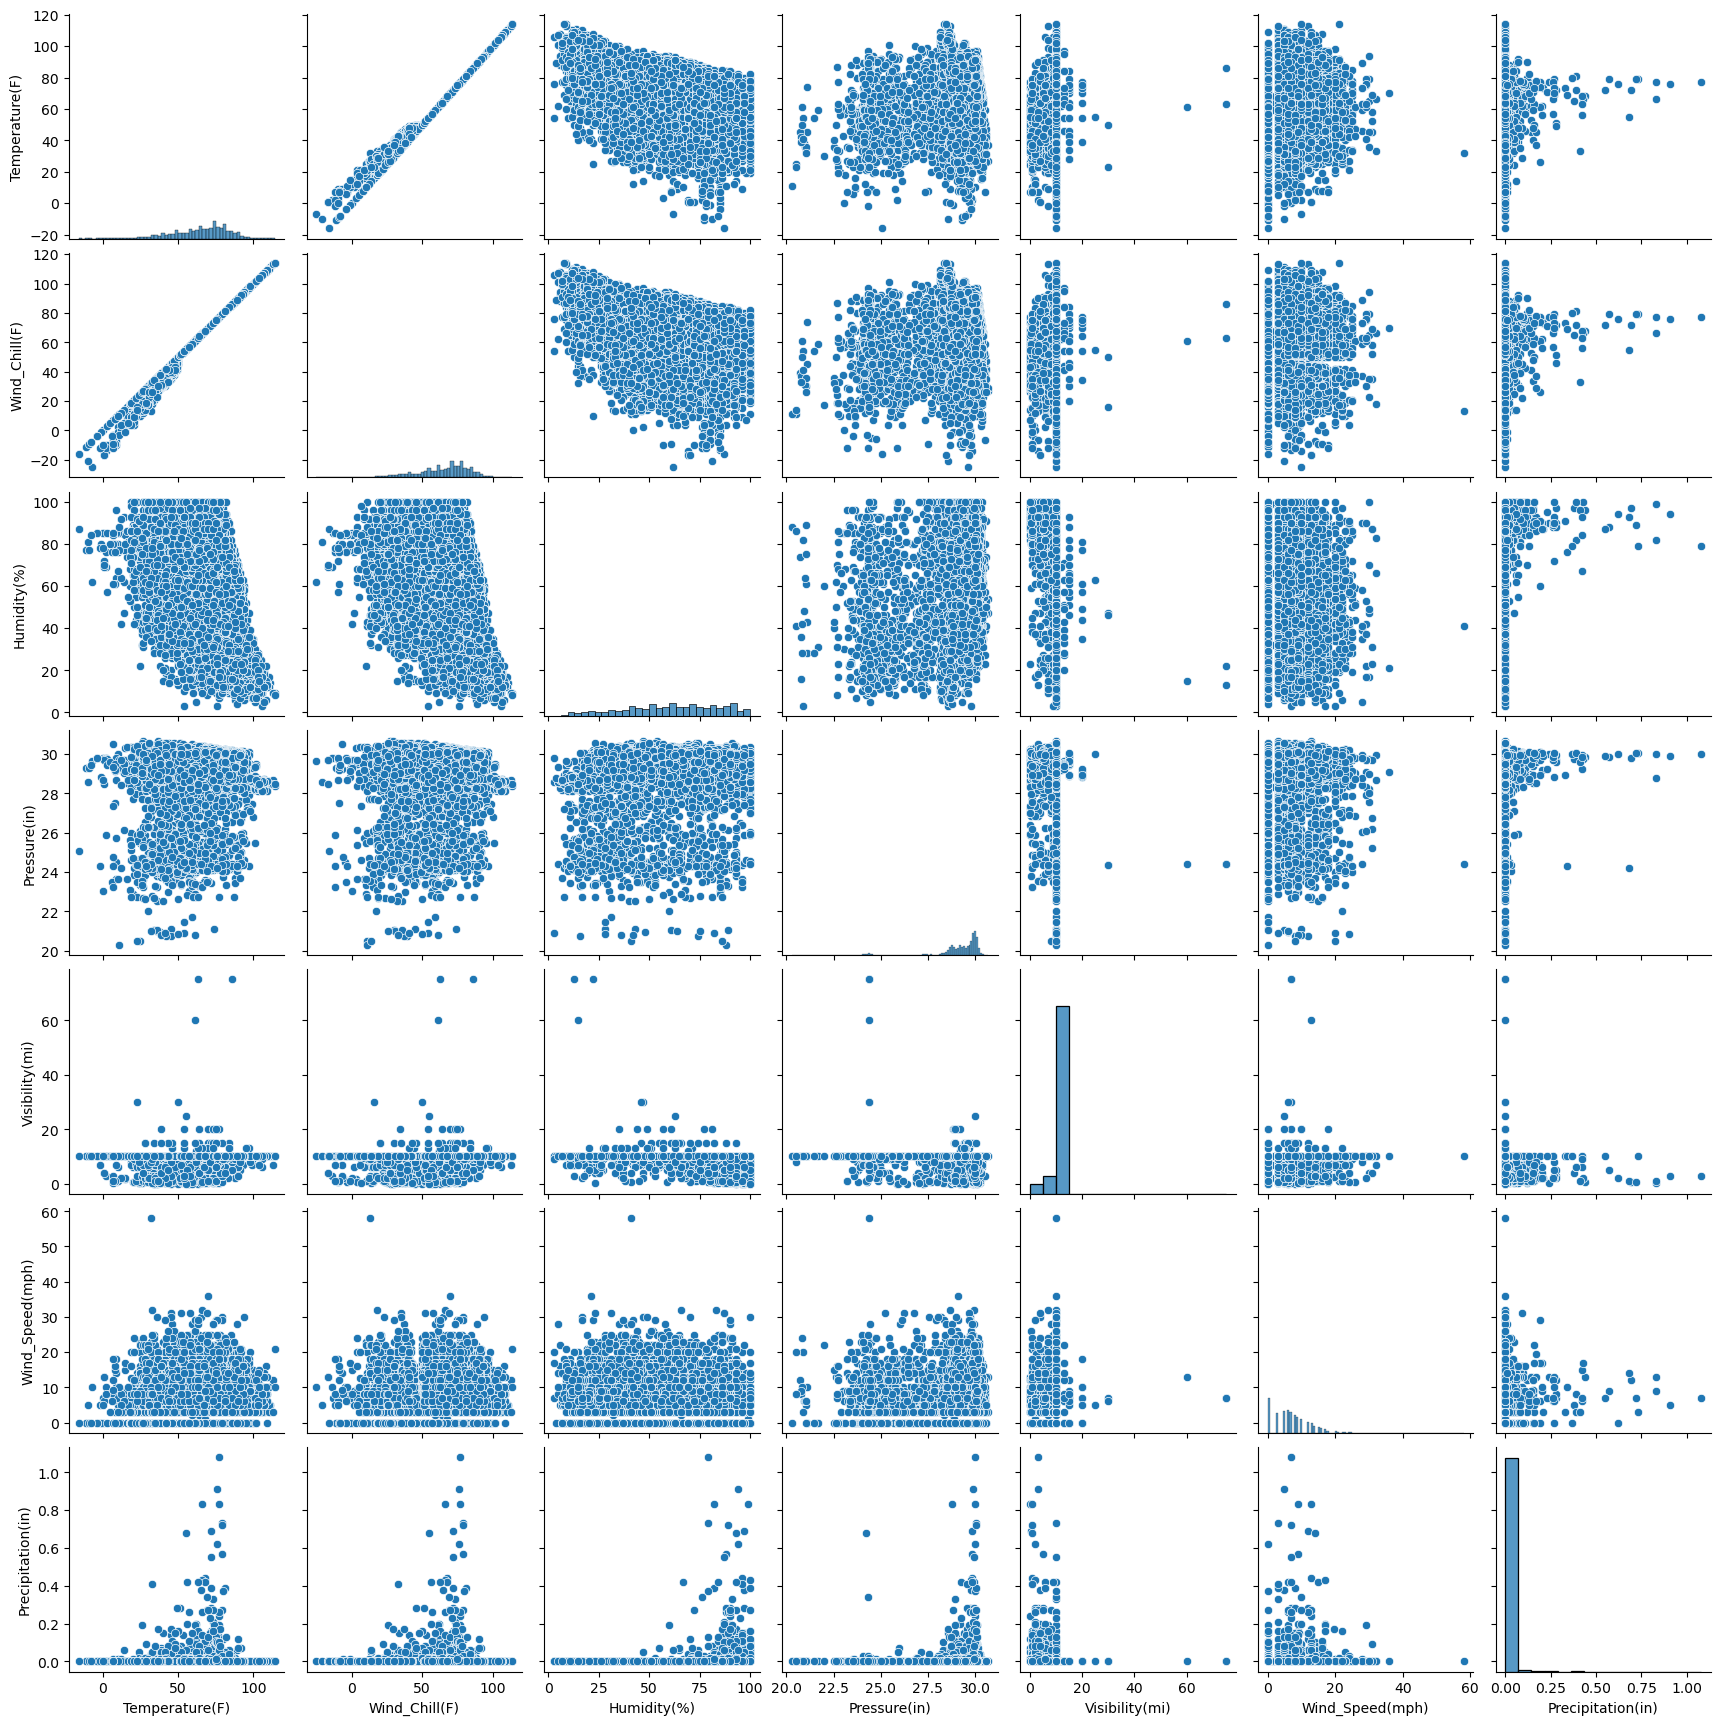

In [40]:
df2=df.iloc[:,[21,22,23,24,25,27,28]]
sampledf=df2.sample(n=10000)
sns.pairplot(data=sampledf, diag_kind='hist', palette='tab10')

<Axes: xlabel='Temperature(F)', ylabel='Humidity(%)'>

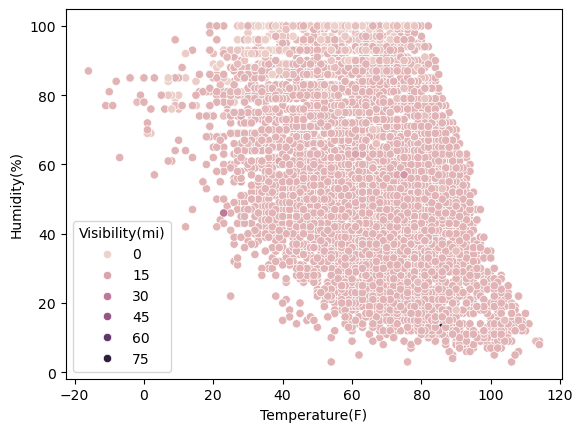

In [42]:
sns.scatterplot(x='Temperature(F)',
                y='Humidity(%)',
                data=sampledf,
                hue='Visibility(mi)')

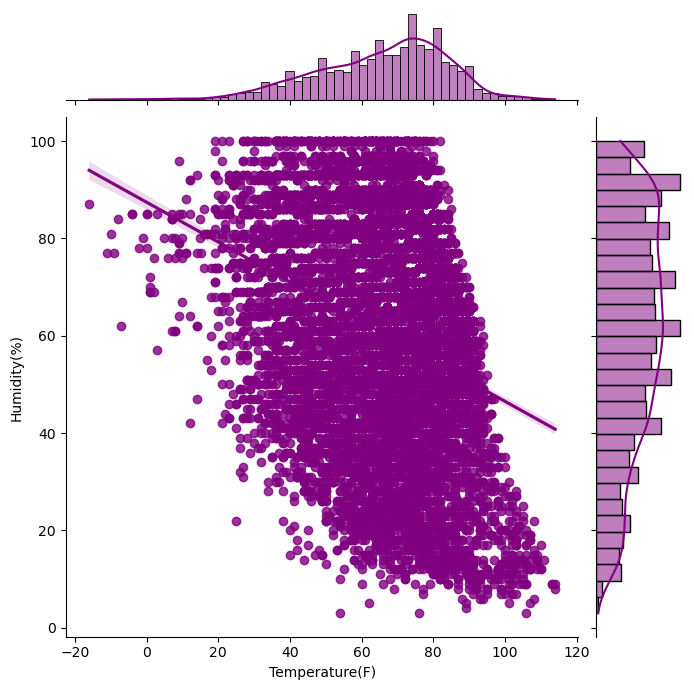

In [44]:
sns.jointplot(x='Temperature(F)',
                y='Humidity(%)',
                data=sampledf,
                kind='reg',
                color='purple',
                height=7)

<Axes: >

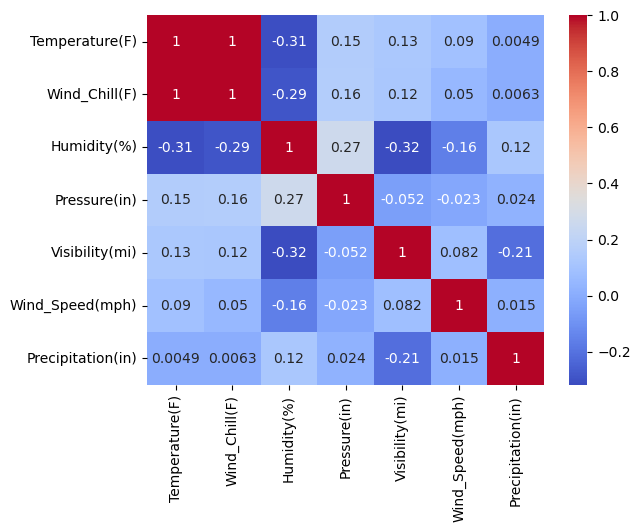

In [45]:
sns.heatmap(sampledf.corr(method="pearson"), cmap='coolwarm', annot=True)